In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_excel(r"C:\Users\ABC\Documents\data Analytics completed projects\Projects\Task 3 Customer Segmentation Using RFM Analysis\Online_Retail.xlsx")

In [56]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [182]:
df["Total_Sales"]=df["Quantity"]*df["UnitPrice"]
rfm=df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (df["InvoiceDate"].max()-x.max()).days,
"InvoiceNo":"nunique",
"Total_Sales": "sum"
}).reset_index()

In [183]:
rfm.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total_Sales":"Monetory"}, inplace=True)

In [184]:
rfm

,CustomerID,Recency,Frequency,Monetory
0,12346.0,325,2,0.00
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4367,18280.0,277,1,180.60
4368,18281.0,180,1,80.82
4369,18282.0,7,3,176.60
4370,18283.0,3,16,2094.88


In [188]:
quantiles=rfm.quantile(q=[0.25,0.50,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetory
0.25,13812.75,16.0,1.0,293.3625
0.50,15300.50,49.0,3.0,648.0750
0.75,16778.25,142.0,5.0,1611.7250


In [190]:

def r_score(x, q):
    if x <= q.loc[0.25, "Recency"]:
        return 4
    elif x <= q.loc[0.50, "Recency"]:
        return 3
    elif x <= q.loc[0.75, "Recency"]:
        return 2
    else:
        return 1

def fm_score(x, col, q):
    if x <= q.loc[0.25, col]:
        return 1
    elif x <= q.loc[0.50, col]:
        return 2
    elif x <= q.loc[0.75, col]:
        return 3
    else:
        return 4


In [192]:
rfm["R_Score"] = rfm["Recency"].apply(lambda x: r_score(x, quantiles))
rfm["F_Score"] = rfm["Frequency"].apply(lambda x: fm_score(x, "Frequency", quantiles))
rfm["M_Score"] = rfm["Monetory"].apply(lambda x: fm_score(x, "Monetory", quantiles))


In [196]:
rfm["Rfm"]=rfm["R_Score"].astype(int)+rfm["F_Score"].astype(int)+rfm["M_Score"].astype(int)

In [198]:
rfm["RfmScore"]= pd.qcut(
    rfm["Rfm"], 
    5, 
    labels=[5,4,3,2,1]
)

In [230]:
quantiles=rfm["Rfm"].quantile(q=[0.25,0.50,0.75])
quantiles

0.25     5.0
0.50     7.0
0.75    10.0
Name: Rfm, dtype: float64

In [236]:

quantiles = rfm["Rfm"].quantile(q=[0.25, 0.50, 0.75])
def rfm_segment(x):
    if x <= quantiles[0.25]:
        return 1
    elif x <= quantiles[0.50]:
        return 2   
    elif x <= quantiles[0.75]:
        return 3  
    else:
        return 4 

rfm["Rfm_Segment"] = rfm["Rfm"].apply(rfm_segment)

In [238]:
rfm

,CustomerID,Recency,Frequency,Monetory,R_Score,F_Score,M_Score,Rfm,RfmScore,Segment,Rfm_Segment
0,12346.0,325,2,0.00,1,2,1,4,5,High Value,1
1,12347.0,1,7,4310.00,4,4,4,12,1,Low Value,4
2,12348.0,74,4,1797.24,2,3,4,9,2,Mid-Low Value,3
3,12349.0,18,1,1757.55,3,1,4,8,3,Mid Value,3
4,12350.0,309,1,334.40,1,1,2,4,5,High Value,1
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,1,1,3,5,High Value,1
4368,18281.0,180,1,80.82,1,1,1,3,5,High Value,1
4369,18282.0,7,3,176.60,4,2,1,7,3,Mid Value,2
4370,18283.0,3,16,2094.88,4,4,4,12,1,Low Value,4


In [246]:
labels={1: "Low Value", 2: "Mid-Low Value",  3:"Mid-High Value", 4:"High Value"}
rfm["Segment"]= rfm["Rfm_Segment"].map(labels)
rfm

,CustomerID,Recency,Frequency,Monetory,R_Score,F_Score,M_Score,Rfm,RfmScore,Segment,Rfm_Segment
0,12346.0,325,2,0.00,1,2,1,4,5,Low Value,1
1,12347.0,1,7,4310.00,4,4,4,12,1,High Value,4
2,12348.0,74,4,1797.24,2,3,4,9,2,Mid-High Value,3
3,12349.0,18,1,1757.55,3,1,4,8,3,Mid-High Value,3
4,12350.0,309,1,334.40,1,1,2,4,5,Low Value,1
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,1,1,3,5,Low Value,1
4368,18281.0,180,1,80.82,1,1,1,3,5,Low Value,1
4369,18282.0,7,3,176.60,4,2,1,7,3,Mid-Low Value,2
4370,18283.0,3,16,2094.88,4,4,4,12,1,High Value,4


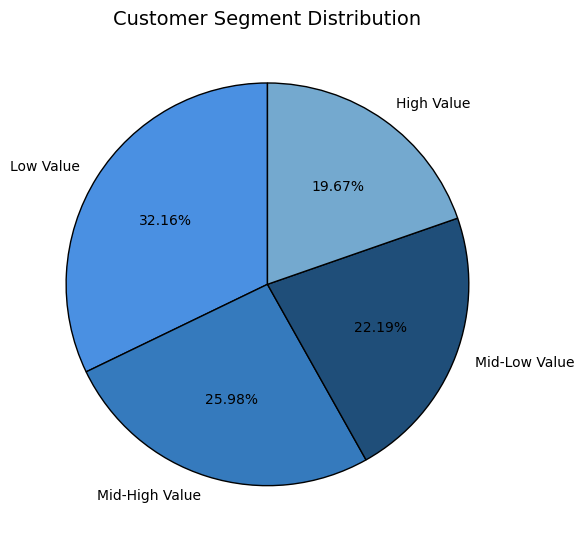

In [338]:
segment_counts = rfm["Segment"].value_counts().reset_index()
segment_counts.columns = ["Segment", "Count"]

plt.figure(figsize=(6,6))
plt.pie(
    segment_counts["Count"], 
    labels=segment_counts["Segment"], 
    autopct="%.2f%%",        # show percentages
    startangle=90,           # rotate start for better look
    colors=["#4a90e2", "#357ABD", "#1f4e79", "#74a9cf"],  # shades of blue
    wedgeprops={'edgecolor':'black'}  # add borders
)
plt.ylabel("")                # remove y-label
plt.title("Customer Segment Distribution", fontsize=14)
plt.tight_layout()
plt.show()

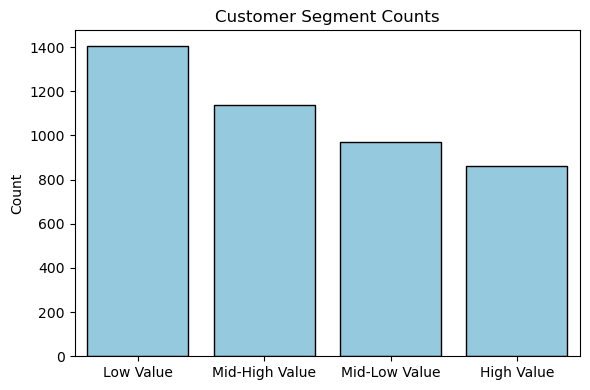

In [324]:

plt.figure(figsize=(6,4))
sns.barplot(
    data=segment_counts, 
    x="Segment", 
    y="Count", 
    color="skyblue",   # use a single color instead of palette
    edgecolor='black'
)

plt.title("Customer Segment Counts")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [252]:
def customer_segment(row):
    if row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return "Champions"
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return "At Risk"
    elif row['R_Score'] >= 3 and row['F_Score'] == 1 and row['M_Score'] == 1:
        return "Explorers"   # changed here
    else:
        return "Hibernating"

rfm["Customer_Type"] = rfm.apply(customer_segment, axis=1)


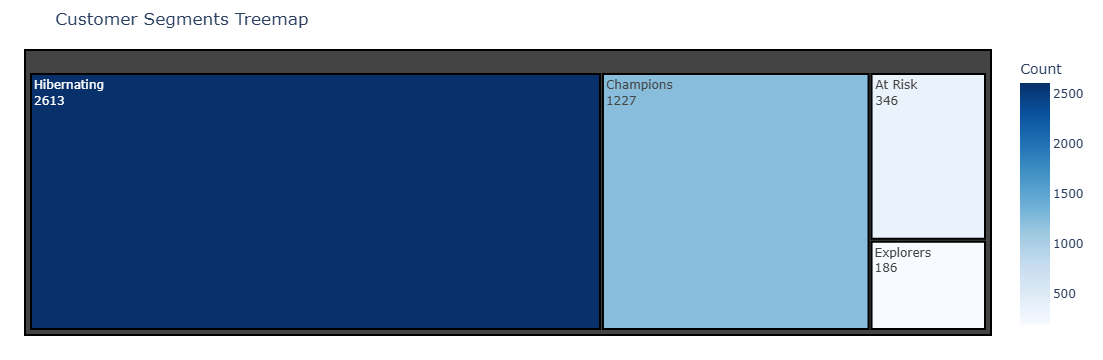

In [336]:
segment_counts = rfm["Customer_Type"].value_counts().reset_index()
segment_counts.columns = ["Customer_Type", "Count"]

fig = px.treemap(
    segment_counts,
    path=["Customer_Type"],
    values="Count",
    title="Customer Segments Treemap",
    color="Count",
    color_continuous_scale="Blues",  # changed to blue theme
    hover_data={"Count": True}
)

fig.update_traces(
    textinfo="label+value", 
    marker=dict(line=dict(color='black', width=2))
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

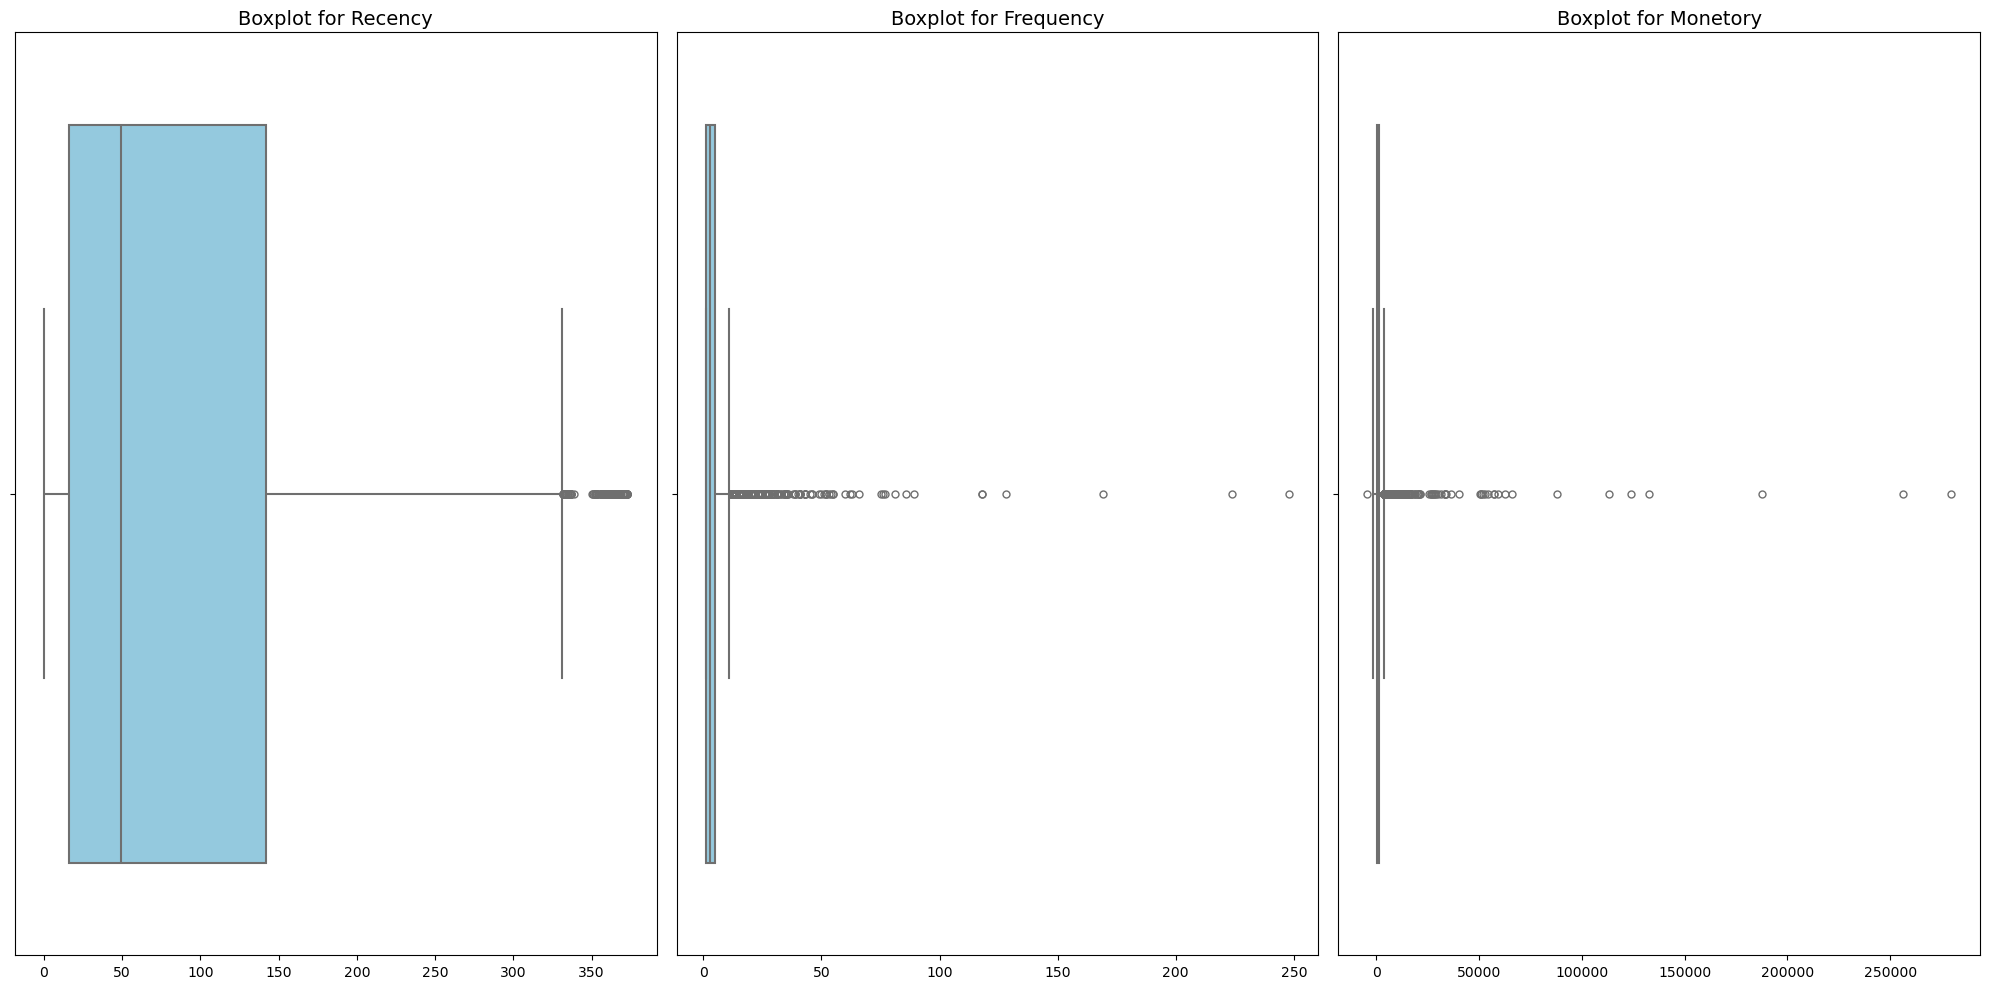

In [328]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes = axes.ravel()

for i, predictor in enumerate(["Recency", "Frequency", "Monetory"]):
    sns.boxplot(
        x=rfm[predictor], 
        ax=axes[i], 
        color="skyblue",  # consistent color
        fliersize=5,       # size of outlier points
        linewidth=1.5      # thicker lines for clarity
    )
    axes[i].set_title(f"Boxplot for {predictor}", fontsize=14)
    axes[i].set_xlabel("")  # optional: remove x-label for cleaner look
    axes[i].set_ylabel("")  # optional: remove y-label if not needed

plt.tight_layout()
plt.show()

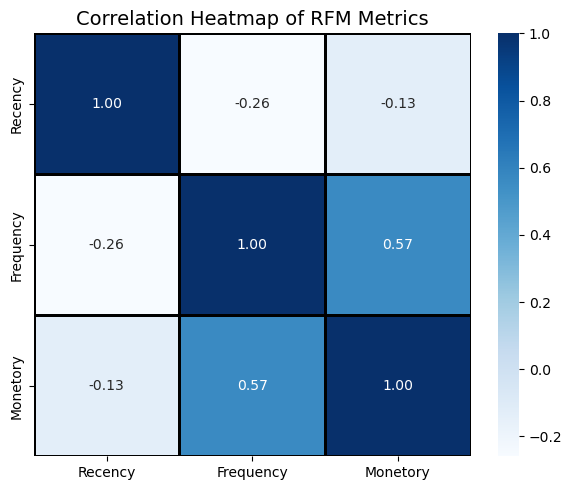

In [332]:
corr = rfm[["Recency", "Frequency", "Monetory"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr, 
    annot=True,           
    fmt=".2f",            
    cmap="Blues",   
    linewidths=1,        
    linecolor='black',   
    cbar=True             
)
plt.title("Correlation Heatmap of RFM Metrics", fontsize=14)
plt.tight_layout()
plt.show()

#### There is a moderate Positive correlation between monetary value and frequency, which makes sense because the more frequently a customer makes purchases, the higher their monetary value tends to be.

In [306]:
cus_seg=rfm.groupby("Customer_Type")[["R_Score","F_Score","M_Score"]].mean().reset_index()

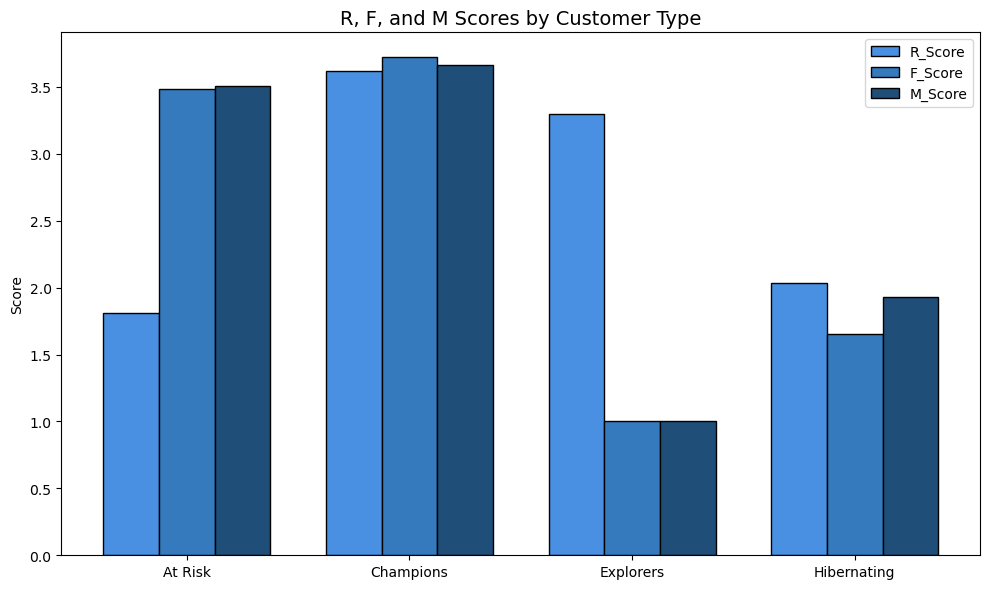

In [334]:
x = np.arange(len(cus_seg["Customer_Type"]))  # positions for each customer type
width = 0.25  # width of each bar

plt.figure(figsize=(10,6))
plt.bar(x - width, cus_seg["R_Score"], width=width, label="R_Score", color="#4a90e2", edgecolor="black")
plt.bar(x, cus_seg["F_Score"], width=width, label="F_Score", color="#357ABD", edgecolor="black")
plt.bar(x + width, cus_seg["M_Score"], width=width, label="M_Score", color="#1f4e79", edgecolor="black")

# Set labels and title
plt.xticks(x, cus_seg["Customer_Type"])
plt.ylabel("Score")
plt.title("R, F, and M Scores by Customer Type", fontsize=14)
plt.legend()
plt.tight_layout()  # avoid overlapping
plt.show()

### Quick Insights
#### Champions: 
- Have the highest scores across all three metrics (R, F, M).They are your most valuable and loyal customers, frequently purchasing and generating high revenue.
#### At Risk
- Low R_Score but moderate F and M scores.
- These customers have purchased frequently and spent moderately in the past but have not made recent purchases, indicating potential churn risk.
#### Explorers
- High R_Score but very low F and M scores.
- They recently made purchases but are not frequent buyers and have low spending—possibly new or one-time customers.
#### Hibernating
- Low across all three scores.
- These customers are disengaged, with infrequent and low-value purchases. They are likely inactive or at risk of being lost entirely.

### Recommendations
- Offer loyalty programs, exclusive deals, or early access to new products to retain high-value customers.
- Run targeted campaigns, personalized offers, discounts, or surveys to re-engage inactive or at-risk customers while assessing cost-effectiveness.
- Encourage occasional buyers to make repeat purchases through onboarding offers, bundles, or reminders to convert them into loyal customers.